## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
import os
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 設定【data的資料夾路徑】，命名為【data_folder】
data_folder = 'C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data'

# 設定t001為某個data路徑
# 設定t002為pd裡read data的功能
t001 = os.path.join(data_folder, 'application_train.csv')
t002 = pd.read_csv(t001)
print('Path of read in data: %s' %t001)
print(t002.shape)
t002.head()

Path of read in data: C:/Users/Ynitsed/Documents/GitHub/2nd-ML100Days/data\application_train.csv
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
t002_sub = t002['HOUSETYPE_MODE']
t002_sub.head(5)

0    block of flats
1    block of flats
2               NaN
3               NaN
4               NaN
Name: HOUSETYPE_MODE, dtype: object

In [4]:
# 看一下【HOUSETYPE_MODE】的狀況
t002['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [5]:
t003 = t002.groupby('HOUSETYPE_MODE')['AMT_CREDIT']
print(t003.mean())
print(t003.describe())

HOUSETYPE_MODE
block of flats      622673.854627
specific housing    569013.724483
terraced house      604587.252475
Name: AMT_CREDIT, dtype: float64
                     count           mean            std      min       25%  \
HOUSETYPE_MODE                                                                
block of flats    150503.0  622673.854627  420686.888053  45000.0  276277.5   
specific housing    1499.0  569013.724483  370176.140276  45000.0  270000.0   
terraced house      1212.0  604587.252475  389040.994229  49500.0  284400.0   

                       50%       75%        max  
HOUSETYPE_MODE                                   
block of flats    522927.0  837000.0  4050000.0  
specific housing  495000.0  781920.0  2517300.0  
terraced house    533668.5  808650.0  2517300.0  


In [6]:
t004 = t002['HOUSETYPE_MODE'].unique()
t004
# 可以發現【HOUSETYPE_MODE】有4個內容，包括null(nan)。

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

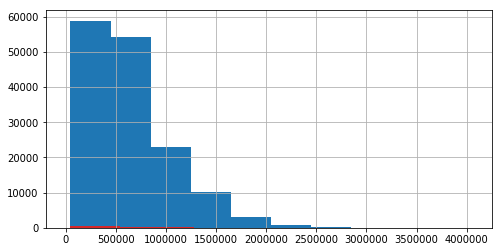

In [7]:
# 圖片大小，要先寫
plt.figure(figsize=(8,4))

# 設定for迴圈
for i in range(len(t004)):
    t002.loc[t002['HOUSETYPE_MODE'] == t004[i], "AMT_CREDIT"].hist()
plt.show()

# 先弄懂一張圖是什麼意思：
# hist自動切了一個bin，依據【AMT_CREDIT】這個measure的狀況去切
# 只是我們現在是跑迴圈，所以會在同一張圖跑4次。

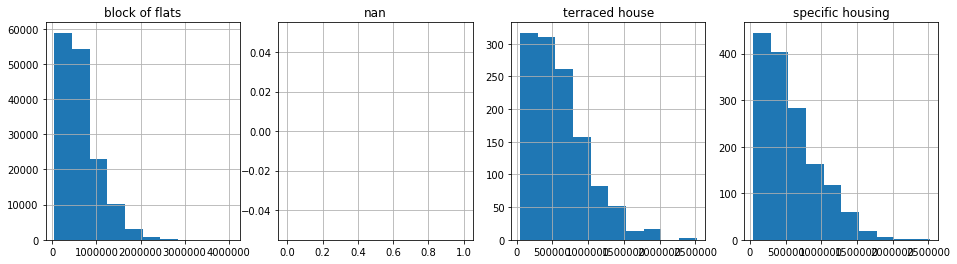

In [8]:
# 現在我們要把4張圖拆開，但該如何讓上面這步驟，知道要拆成【4張圖】呢？
# 即是利用subplot這東西。

# 依據t004的個數當作行、直接指定1列
ncols = len(t004)
nrows = 1

# 圖片大小，要先寫
plt.figure(figsize=(16,4))

# 
for i in range(len(t004)):
    plt.subplot(nrows, ncols, i+1)
    t002.loc[t002['HOUSETYPE_MODE'] == t004[i], "AMT_CREDIT"].hist()
    plt.title(t004[i])

plt.show()

# 再弄懂四張圖是什麼意思：
# hist自動切了一個bin，依據【AMT_CREDIT】這個measure的狀況去切
# 我們現在跑迴圈，還利用了subplot這個函式，去將跑了4次的圖給拆開成4張圖。
# 但這4張圖的排列方式，是1*4 or 2*2 or 4*1，要利用subplot的參數去設計。
# 在測試過程中，會發現subplot會先判斷 ncols 這個參數，等於是先設計好有幾個欄位，再開始把圖從第一列第一欄放上去。
# 而當列位不足時，就會跳錯誤，所以順序上應該先設計【ncols】再設計【nrows】。原教材答案的設計方式並不正確。

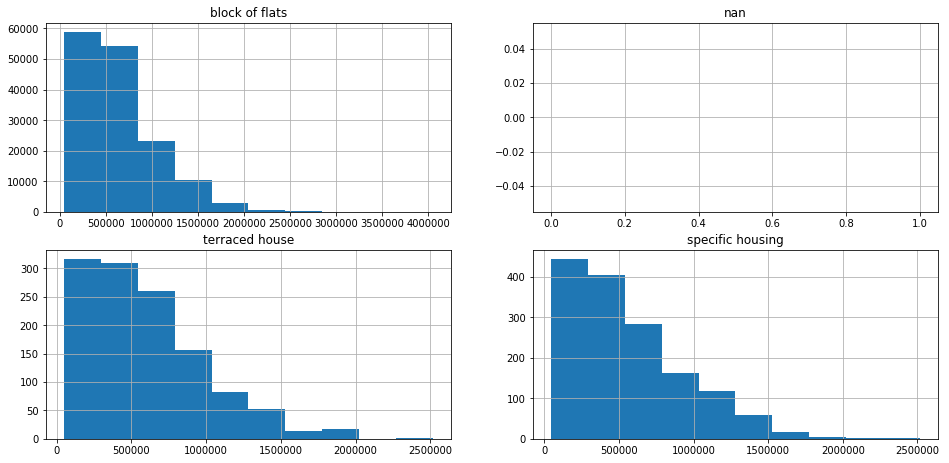

In [9]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
t004 = t002['HOUSETYPE_MODE'].unique()

# 這是原教材的寫法，會令人不懂【nrows//2】是在幹什麼？
# 先設計row的觀念也是錯誤的
# 而且只有4張圖，照以下設計卻設計了8個位置，不由得讓人好奇出題者自己懂不懂這個意義？
nrows = len(t004)    # = 4
ncols = nrows // 2   # = 2
                     # 4*2=8

# 圖片大小，要先寫
plt.figure(figsize=(16,16))

# 
for i in range(len(t004)):
    plt.subplot(nrows, ncols, i+1)
    t002.loc[t002['HOUSETYPE_MODE'] == t004[i], "AMT_CREDIT"].hist()
    plt.title(t004[i])

plt.show()    

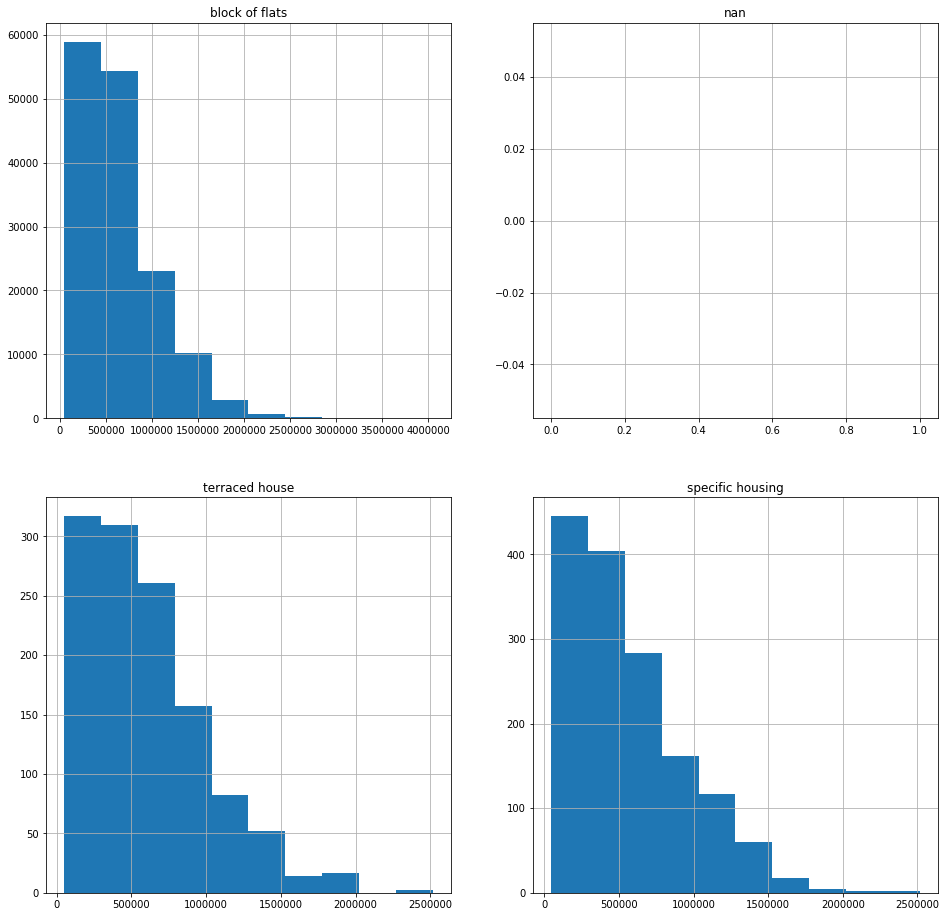

In [10]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
t004 = t002['HOUSETYPE_MODE'].unique()

# 先設計ncols才對，不管圖片有幾張，反正就是以兩欄的方式呈現
ncols = 2
# 既然圖片已經被我拆成了2欄，那只需要【圖片總數/2】的列位就夠了
# 擔心剛好不能被2整除，所以要無條件進入，這樣的列位數才夠。
# 例如若你設計 ncols = 3，那你需要ceil(4/3)=2個列位(總共2*3=6個位置)才能裝得下4張圖片。
nrows = math.ceil(len(t004) / ncols)
# 換句話說，我們總共設計了【圖片總數/2】*【2】=【圖片總數】的位置，要存放我們將要拆的圖片。

# 圖片大小，要先寫
plt.figure(figsize=(16,16))

# 看來subplot最後一個參數，都是從1開始，偏偏range是從0開始，只好寫成i+1了
# 我還是不懂python當初的設計，為何不直接從1開始就好，弄成這樣不是徒增自己困擾？
# i+1，range(4)，也就是會從1跑到4，會剛好有4張圖片。
# i+2，range(4)，也就是會從2跑到5，可以試著改看看，會跳錯誤，為什麼會跳錯呢？
# 因為前面【ncols】和【nrows】你只設計了4個空間要給他跑，但現在卻要求要塞在第5個位置(第一欄第三列，但我沒有設計第三列啊)，當然會錯了。
# 從nan(第2個)在右上角也可以看出，系統是先將第一列由左至右填滿，再往下填下一列。再次得證，要先決定好【ncols】才是對的。
for i in range(len(t004)):
    plt.subplot(nrows, ncols, i+1)
    t002.loc[t002['HOUSETYPE_MODE'] == t004[i], "AMT_CREDIT"].hist()
    plt.title(t004[i])

plt.show()    

### Day14教材方向和目標
1. plt.subplot(nrows, ncols, i+1)

### Day14忽略部分
無
 
### Day14其他補充
皆在上述murmur完，教材先設計nrows是錯誤觀念。  
如果圖片填補順序是先將欄位填滿，再往下一個列位去填，  
那當然應該要先把欄位數確定下來，列位數再依據設定好的欄位數去調整。  
[社群詢問](https://www.cupoy.com/qa/kwassist/ai_tw/0000016A838367EE0000026B6375706F795F72656C656173655155455354)